In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

#lines 7 and 8 make the code run on Kolton's laptop
import os
os.environ["PROJ_LIB"] ="C:/Users/kolto/Anaconda3/Library/share"; #fixr

from mpl_toolkits.basemap import Basemap
import pickle


In [2]:
# Load in hurricane data
atlantic = np.load("../Data/atlantic_series.pickle",allow_pickle=True)
pacific = np.load("../Data/pacific_series.pickle",allow_pickle=True)

In [16]:
# Getting indices of longest hurricanes, for a more interesting plot

at_lens = []
for a in atlantic:
    at_lens.append(len(a))

a_longest = np.where(np.array(at_lens) > 77)[0]

pc_lens = []
for p in pacific:
    pc_lens.append(len(p))

p_longest = np.where(np.array(pc_lens) > 70)[0]

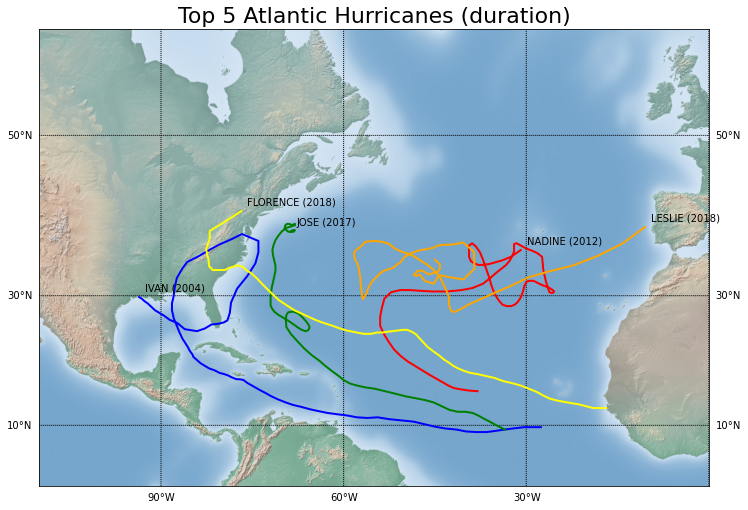

In [16]:
n = 5 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))

# Set up the map and the longitude-latitude window
m = Basemap(llcrnrlon=-110.,llcrnrlat=0.,urcrnrlon=0.,urcrnrlat=60.,
            rsphere=(6378137.00,6356752.3142),
            resolution=None,
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)


#m.bluemarble() # Plot the pretty NASA picture
m.shadedrelief() #Plot a translucent relief map 
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

colors = ['blue','red','green','yellow','orange','lime','pink','purple','cyan','brown']

# Plot the trajectories
for i in range(n):
    j = i
    i = a_longest[i]
    year = atlantic[i]['Date'].values[0][-4:]
    name = atlantic[i]['Time'].values[0].strip()
    lat = atlantic[i]["Latitude"][1:].values
    long = -atlantic[i]["Longitude"][1:].values # Make sure the longitude
    xpt, ypt = m(long, lat)
    plt.text(xpt[len(lat) - 1]+100000,ypt[len(long) - 1]+100000, f'{name} ({year})', color='k')
    m.plot(xpt, ypt, linewidth=2, color=colors[j])
    
plt.title('Top 5 Atlantic Hurricanes (duration)', fontsize=22)
plt.savefig('atlantic_hurricanes')
plt.show()

C:\Users\kolto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


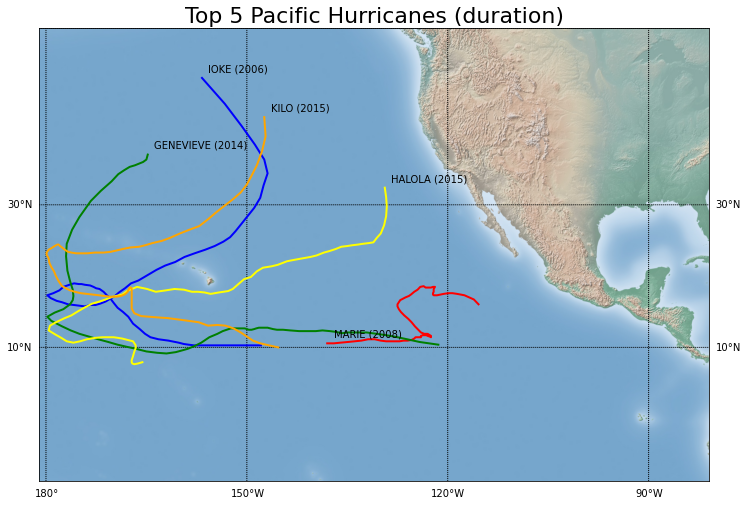

In [17]:
n = 5 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))
m = Basemap(llcrnrlon=-181.,llcrnrlat=-10.,urcrnrlon=-81.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='h',
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
#m.bluemarble() #Pretty NASA picture
# m.fillcontinents(color='#D3D3D3')

m.shadedrelief() #Plot a translucent relief map 

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

colors = ['blue','red','green','yellow','orange','lime','pink','purple','cyan','brown']

for i in range(n):
    j = i
    i = p_longest[i]
    year = pacific[i]['Date'].values[0][-4:]
    name = pacific[i]['Time'].values[0].strip()
    lat = pacific[i]["Latitude"][1:].values
    long = -pacific[i]["Longitude"][1:].values # Make sure the longitude
    xpt, ypt = m(long, lat)
    plt.text(xpt[len(lat) - 1]+100000,ypt[len(long) - 1]+100000, f'{name} ({year})', color='k')
    m.plot(xpt, ypt, linewidth=2, color=colors[j], label=f'{name} ({year})')
#     plt.plot(xpt[-1],ypt[-1],'*',color=colors[i-8])
# plt.legend()
    
plt.title('Top 5 Pacific Hurricanes (duration)', fontsize=22)
plt.savefig('pacific_hurricanes')
plt.show()

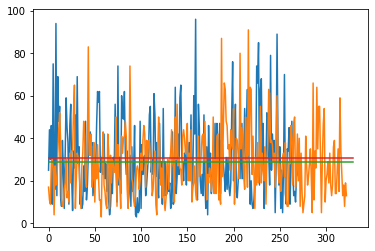

In [171]:
plt.plot([len(a) for a in atlantic])
plt.plot([len(a) for a in pacific])
plt.plot(np.ones(330)*np.mean([len(a) for a in pacific]))
plt.plot(np.ones(330)*np.mean([len(a) for a in atlantic]))

In [8]:
# huricane Bonnie 
bonnie = np.load("hurricane_bonnie",allow_pickle=True)
print(bonnie)

(array([38, 39, 40, 41, 42], dtype=int64), [30.2, 31.9, 33.5, 35.5, 37.1])


# SAM VARMAX 

C:\Users\kolto\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


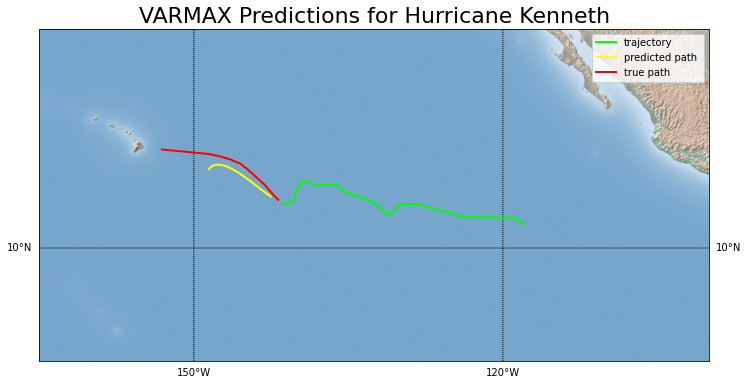

In [45]:
#KENNETH  
Karina = np.load("../Data/VARMAX_KENNETH.pickle",allow_pickle=True)
name = Karina["Hurricane Name"]
lat = Karina['Observed Points'][:, 0]
long = -1*Karina['Observed Points'][:, 1]
true_lat = Karina['True Trajectory'][:,0]
true_long = -1*Karina['True Trajectory'][:, 1]
pred_lat = Karina["Predicted Trajectory"][:,0]
pred_long = -1*Karina["Predicted Trajectory"][:,1]
params = Karina["Model Parameters (p, q)"]

print(len(lat))
print(len(long))
n = 1 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))
m = Basemap(llcrnrlon=-165.,llcrnrlat=-1.,urcrnrlon=-100.,urcrnrlat=30.,
            rsphere=(6378137.00,6356752.3142),
            resolution='h',
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
#m.bluemarble() #Pretty NASA picture
# m.fillcontinents(color='#D3D3D3')

m.shadedrelief() #Plot a translucent relief map 

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

xpt, ypt = m(long, lat)
#plt.text(xpt[len(lat) - 1]+100000,ypt[len(long) - 1]+100000, f'{name} ({year})', color='k')
m.plot(xpt, ypt, linewidth=2, color='lime', label="trajectory")

#plt.annotate('', 
#            xytext = (xpt[5], ypt[5]),
#            xy = (xpt[6], ypt[6]),
#            arrowprops = dict(arrowstyle="-|>", color='lime'),
#            size= 30)

xpt, ypt = m(pred_long, pred_lat)
#plt.text(xpt[len(pred_lat) - 1]+100000,ypt[len(pred_long) - 1]+100000, f'{name} ({year})', color='k')
m.plot(xpt, ypt, linewidth=2, color='yellow', label="predicted path ")


xpt, ypt = m(true_long, true_lat)
m.plot(xpt, ypt, linewidth=2, color='red', label="true path")

    
plt.title('VARMAX Predictions for Hurricane Kenneth', fontsize=22)
plt.legend()
plt.savefig('KENNETH_VARMAX')
plt.show()

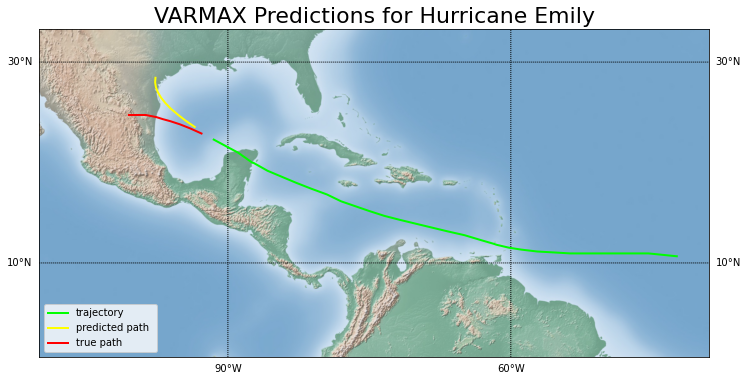

In [114]:
#EMILY  
SAM = np.load("../Data/VARMAX_EMILY.pickle",allow_pickle=True)
name = SAM["Hurricane Name"]
lat = SAM['Observed Points'][:, 0]
long = -1*SAM['Observed Points'][:, 1]
true_lat = SAM['True Trajectory'][:,0]
true_long = -1*SAM['True Trajectory'][:, 1]
pred_lat = SAM["Predicted Trajectory"][:,0]
pred_long = -1*SAM["Predicted Trajectory"][:,1]
params = SAM["Model Parameters (p, q)"]


# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))
m = Basemap(llcrnrlon=-110.,llcrnrlat=0.,urcrnrlon=-39.,urcrnrlat=33.,
            rsphere=(6378137.00,6356752.3142),
            resolution=None,
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)


m.shadedrelief() #Plot a translucent relief map 

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

xpt, ypt = m(long, lat)
m.plot(xpt, ypt, linewidth=2, color='lime', label="trajectory")

#plt.annotate('', 
#            xytext = (xpt[5], ypt[5]),
#            xy = (xpt[6], ypt[6]),
#            arrowprops = dict(arrowstyle="-|>", color='lime'),
#            size= 30)

xpt, ypt = m(pred_long, pred_lat)
m.plot(xpt, ypt, linewidth=2, color='yellow', label="predicted path ")


xpt, ypt = m(true_long, true_lat)
m.plot(xpt, ypt, linewidth=2, color='red', label="true path")

    
plt.title('VARMAX Predictions for Hurricane Emily', fontsize=22)
plt.legend()
plt.savefig('EMILY_VARMAX')
plt.show()

C:\Users\kolto\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


[4025958.7386096  3961577.35885227 3895518.11916113 3828806.54019113
 3763304.49868657 3700430.16484552 3641650.47134517 3588072.02701667
 3540547.63958764 3499555.47577731 3465242.79923805 3437424.58269425
 3415641.61269637 3399214.93647141] [2613028.71285885 2659234.83515092 2709876.96710813 2761058.19401526
 2809588.4129544  2852538.82000335 2887766.59410535 2913832.98530138
 2930139.07189868 2936843.10071904 2934798.30941975 2925402.17053577
 2910437.86240777 2891891.52906457]


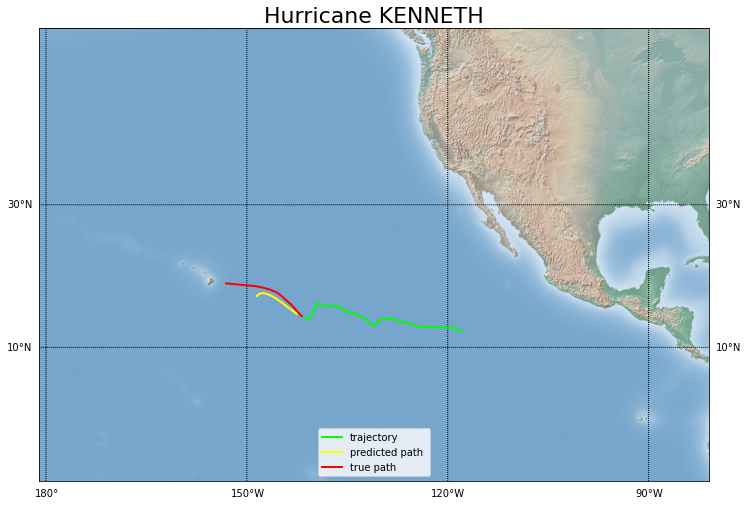

In [4]:
#Karina, Celia, Guillermo 
Karina = np.load("../Data/VARMAX_KENNETH.pickle",allow_pickle=True)
name = Karina["Hurricane Name"]
lat = Karina['Observed Points'][:, 0]
long = -1*Karina['Observed Points'][:, 1]
true_lat = Karina['True Trajectory'][:,0]
true_long = -1*Karina['True Trajectory'][:, 1]
pred_lat = Karina["Predicted Trajectory"][:,0]
pred_long = -1*Karina["Predicted Trajectory"][:,1]
params = Karina["Model Parameters (p, q)"]

n = 1 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))
m = Basemap(llcrnrlon=-181.,llcrnrlat=-10.,urcrnrlon=-81.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='h',
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
#m.bluemarble() #Pretty NASA picture
# m.fillcontinents(color='#D3D3D3')

m.shadedrelief() #Plot a translucent relief map 

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

xpt, ypt = m(long, lat)
#plt.text(xpt[len(lat) - 1]+100000,ypt[len(long) - 1]+100000, f'{name} ({year})', color='k')
m.plot(xpt, ypt, linewidth=2, color='lime', label="trajectory")

xpt, ypt = m(pred_long, pred_lat)
#plt.text(xpt[len(pred_lat) - 1]+100000,ypt[len(pred_long) - 1]+100000, f'{name} ({year})', color='k')
m.plot(xpt, ypt, linewidth=2, color='yellow', label="predicted path ")
print(xpt, ypt)

xpt, ypt = m(true_long, true_lat)
m.plot(xpt, ypt, linewidth=2, color='red', label="true path")

    
plt.title('Hurricane KENNETH', fontsize=22)
plt.legend()
plt.savefig('KENNETH')
plt.show()

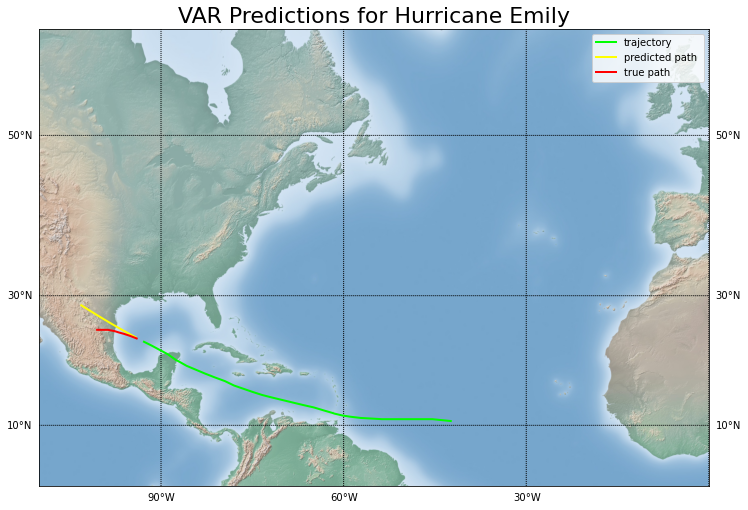

In [13]:
#Unpacking Chelsey's data
mydict = np.load("./emily_path_chelsey",allow_pickle=True) 
#true_traj, projected_traj, true_project_traj

ken_traj_lat = mydict['Emily'][0][0]
ken_pred_lat = mydict['Emily'][1][0]
ken_true_lat = mydict["Emily"][2][0]

#true_traj, projected_traj, true_project_traj
ken_traj_long = mydict['Emily'][0][1]
ken_pred_long = mydict['Emily'][1][1]
ken_true_long = mydict["Emily"][2][1]
#KENNETH  

name = "Emily"
lat = ken_traj_lat
long = [-1*k for k in ken_traj_long]
true_lat = ken_true_lat
true_long = [-1* k for k in ken_true_long]
pred_lat = ken_pred_lat
pred_long = [-1*k for k in ken_pred_long]

n = 1 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))

m = Basemap(llcrnrlon=-110.,llcrnrlat=0.,urcrnrlon=0.,urcrnrlat=60.,
            rsphere=(6378137.00,6356752.3142),
            resolution=None,
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)

#m = Basemap(llcrnrlon=-165.,llcrnrlat=-1.,urcrnrlon=-100.,urcrnrlat=30.,
#            rsphere=(6378137.00,6356752.3142),
#            resolution='h',
#            projection='merc',
#            lat_0=40.,lon_0=-20.,lat_ts=20.)


m.shadedrelief() #Plot a translucent relief map 

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

xpt, ypt = m(long, lat)

m.plot(xpt, ypt, linewidth=2, color='lime', label="trajectory")

#plt.annotate('', 
#            xytext = (xpt[5], ypt[5]),
#            xy = (xpt[6], ypt[6]),
#            arrowprops = dict(arrowstyle="-|>", color='lime'),
#            size= 30)

xpt, ypt = m(pred_long, pred_lat)

m.plot(xpt, ypt, linewidth=2, color='yellow', label="predicted path ")


xpt, ypt = m(true_long, true_lat)
m.plot(xpt, ypt, linewidth=2, color='red', label="true path")

    
plt.title('VAR Predictions for Hurricane Emily', fontsize=22)
plt.legend()
plt.savefig('EMILY_VAR')
plt.show()

C:\Users\kolto\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


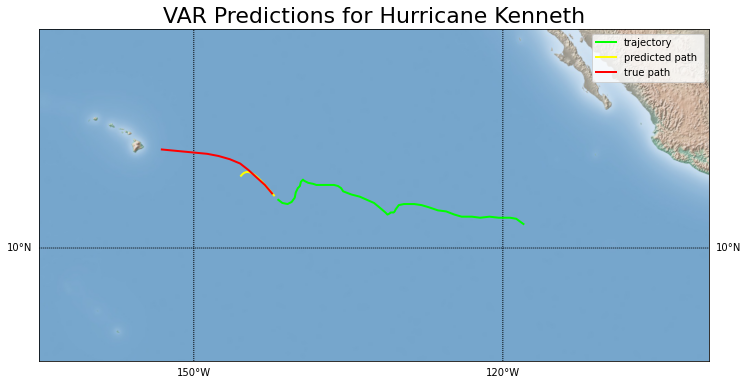

In [6]:
#Unpacking Chelsey's data
mydict = np.load("./kenneth_path_chelsey",allow_pickle=True) 
#true_traj, projected_traj, true_project_traj

ken_traj_lat = mydict['Kenneth'][0][0]
ken_pred_lat = mydict['Kenneth'][1][0]
ken_true_lat = mydict["Kenneth"][2][0]

#true_traj, projected_traj, true_project_traj
ken_traj_long = mydict['Kenneth'][0][1]
ken_pred_long = mydict['Kenneth'][1][1]
ken_true_long = mydict["Kenneth"][2][1]

#KENNETH  

name = "Kenneth"
lat = ken_traj_lat
long = [-1*k for k in ken_traj_long]
true_lat = ken_true_lat
true_long = [-1* k for k in ken_true_long]
pred_lat = ken_pred_lat
pred_long = [-1*k for k in ken_pred_long]

n = 1 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))

#m = Basemap(llcrnrlon=-110.,llcrnrlat=0.,urcrnrlon=0.,urcrnrlat=60.,
#            rsphere=(6378137.00,6356752.3142),
#            resolution=None,
#            projection='merc',
#            lat_0=40.,lon_0=-20.,lat_ts=20.)

m = Basemap(llcrnrlon=-165.,llcrnrlat=-1.,urcrnrlon=-100.,urcrnrlat=30.,
            rsphere=(6378137.00,6356752.3142),
            resolution='h',
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)


m.shadedrelief() #Plot a translucent relief map 

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

xpt, ypt = m(long, lat)

m.plot(xpt, ypt, linewidth=2, color='lime', label="trajectory")

#plt.annotate('', 
#            xytext = (xpt[5], ypt[5]),
#            xy = (xpt[6], ypt[6]),
#            arrowprops = dict(arrowstyle="-|>", color='lime'),
#            size= 30)

xpt, ypt = m(pred_long, pred_lat)

m.plot(xpt, ypt, linewidth=2, color='yellow', label="predicted path ")


xpt, ypt = m(true_long, true_lat)
m.plot(xpt, ypt, linewidth=2, color='red', label="true path")

    
plt.title('VAR Predictions for Hurricane Kenneth', fontsize=22)
plt.legend()
plt.savefig('KENNETH_VAR')
plt.show()

In [19]:
mydict = np.load("./emily_latitude_chelsey",allow_pickle=True) 


In [18]:
mydict = np.load("./kenneth_path_chelsey",allow_pickle=True) 


# THOMAS' RNN 

C:\Users\kolto\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


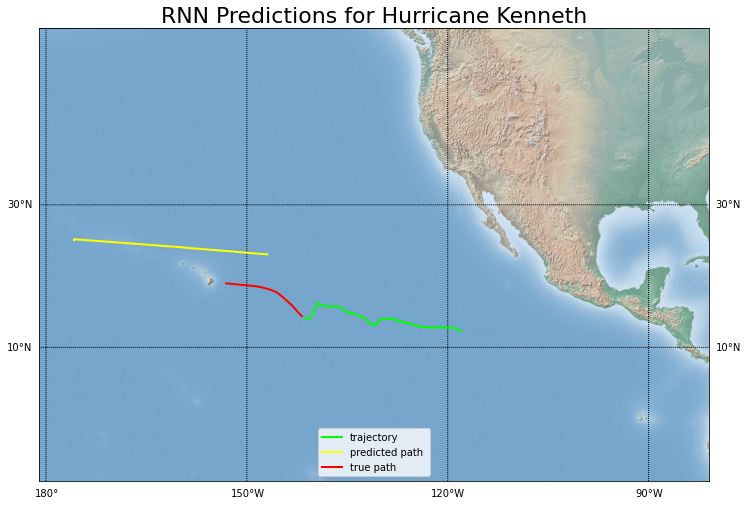

In [5]:
THOM = np.load("../Data/RNN_KENNETH.pickle",allow_pickle=True)

name = THOM["Hurricane Name"]
lat = THOM['Observed Points'][:, 0]
long = -1*THOM['Observed Points'][:, 1]
true_lat = THOM['True Trajectory'][:,0]
true_long = -1*THOM['True Trajectory'][:, 1]
pred_lat = THOM["Predicted Trajectory"][:,0]
pred_long = -1*THOM["Predicted Trajectory"][:,1]
params = THOM["Model Parameters (num_timesteps)"]

#KENNETH  

n = 1 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))

m = Basemap(llcrnrlon=-181.,llcrnrlat=-10.,urcrnrlon=-81.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='h',
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)

#m = Basemap(llcrnrlon=-165.,llcrnrlat=-1.,urcrnrlon=-100.,urcrnrlat=30.,
#            rsphere=(6378137.00,6356752.3142),
#            resolution='h',
#            projection='merc',
#            lat_0=40.,lon_0=-20.,lat_ts=20.)


m.shadedrelief() #Plot a translucent relief map 

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

xpt, ypt = m(long, lat)

m.plot(xpt, ypt, linewidth=2, color='lime', label="trajectory")

#plt.annotate('', 
#            xytext = (xpt[5], ypt[5]),
#            xy = (xpt[6], ypt[6]),
#            arrowprops = dict(arrowstyle="-|>", color='lime'),
#            size= 30)

xpt, ypt = m(pred_long, pred_lat)

m.plot(xpt, ypt, linewidth=2, color='yellow', label="predicted path ")


xpt, ypt = m(true_long, true_lat)
m.plot(xpt, ypt, linewidth=2, color='red', label="true path")

    
plt.title('RNN Predictions for Hurricane Kenneth', fontsize=22)
plt.legend()
plt.savefig('KENNETH_RNN')
plt.show()

In [6]:
ken = np.load("../Data/RNN_EMILY.pickle",allow_pickle=True)

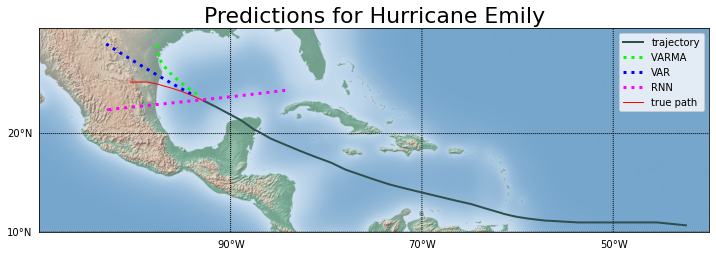

In [39]:
#EMILY COMBINED
#unpack Sam's data
SAM = np.load("../Data/VARMAX_EMILY.pickle",allow_pickle=True)
VARMA_name = SAM["Hurricane Name"]
VARMA_lat = SAM['Observed Points'][:, 0]
VARMA_long = -1*SAM['Observed Points'][:, 1]
VARMA_true_lat = SAM['True Trajectory'][:,0]
VARMA_true_long = -1*SAM['True Trajectory'][:, 1]
VARMA_pred_lat = SAM["Predicted Trajectory"][:,0]
VARMA_pred_long = -1*SAM["Predicted Trajectory"][:,1]
VARMA_params = SAM["Model Parameters (p, q)"]

#unpack Thomas' data
THOM = np.load("../Data/RNN_EMILY.pickle",allow_pickle=True)
RNN_name = THOM["Hurricane Name"]
RNN_lat = THOM['Observed Points'][:, 0]
RNN_long = -1*THOM['Observed Points'][:, 1]
RNN_true_lat = THOM['True Trajectory'][:,0]
RNN_true_long = -1*THOM['True Trajectory'][:, 1]
RNN_pred_lat = THOM["Predicted Trajectory"][:,0]
RNN_pred_long = -1*THOM["Predicted Trajectory"][:,1]
RNN_params = THOM["Model Parameters (num_timesteps)"]

#Unpacking Chelsey's data
CHEL = np.load("./emily_path_chelsey",allow_pickle=True) 
#true_traj, projected_traj, true_project_traj
VAR_lat = CHEL['Emily'][0][0]
VAR_pred_lat = CHEL['Emily'][1][0]
VAR_true_lat = CHEL["Emily"][2][0]
#true_traj, projected_traj, true_project_traj
VAR_long = CHEL['Emily'][0][1]
VAR_pred_long = CHEL['Emily'][1][1]
VAR_true_long = CHEL["Emily"][2][1]
#and move into the right hemisphere 
VAR_long = [-1*k for k in VAR_long]
VAR_true_long = [-1* k for k in VAR_true_long]
VAR_pred_long = [-1*k for k in VAR_pred_long]


# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))

m = Basemap(llcrnrlon=-110.,llcrnrlat=10.,urcrnrlon=-40.,urcrnrlat=30.,
            rsphere=(6378137.00,6356752.3142),
            resolution=None,
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)

m.shadedrelief() #Plot a translucent relief map 

m.drawparallels(np.arange(10,30,10),labels=[1,0,0,1])
m.drawmeridians(np.arange(-90,-40,20),labels=[1,1,0,1])

#plot trajectory, the same for every model 
xpt, ypt = m(VAR_long, VAR_lat)
m.plot(xpt, ypt, linewidth=2, color='darkslategray', label="trajectory")

#plot predictions from each model 
xpt, ypt = m(VARMA_pred_long, VARMA_pred_lat)
m.plot(xpt, ypt, linewidth=3, color='lime', label="VARMA ", linestyle='dotted')

xpt, ypt = m(VAR_pred_long, VAR_pred_lat)
m.plot(xpt, ypt, linewidth=3, color='b', label="VAR", linestyle='dotted')

xpt, ypt = m(RNN_pred_long, RNN_pred_lat)
m.plot(xpt, ypt, linewidth=3, color='magenta', label="RNN", linestyle='dotted')

#plot the true path , the same for each model
xpt, ypt = m(VARMA_true_long, VARMA_true_lat)
m.plot(xpt, ypt, linewidth=1, color='red', label="true path")

    
plt.title('Predictions for Hurricane Emily', fontsize=22)
plt.legend()
plt.savefig('EMILY_COMBINED')
plt.show()

C:\Users\kolto\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


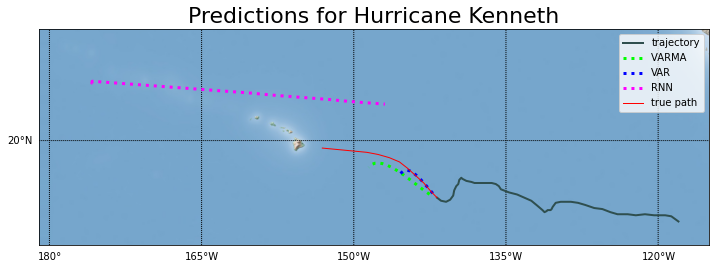

In [55]:
#EMILY COMBINED
#unpack Sam's data
SAM = np.load("../Data/VARMAX_KENNETH.pickle",allow_pickle=True)
VARMA_name = SAM["Hurricane Name"]
VARMA_lat = SAM['Observed Points'][:, 0]
VARMA_long = -1*SAM['Observed Points'][:, 1]
VARMA_true_lat = SAM['True Trajectory'][:,0]
VARMA_true_long = -1*SAM['True Trajectory'][:, 1]
VARMA_pred_lat = SAM["Predicted Trajectory"][:,0]
VARMA_pred_long = -1*SAM["Predicted Trajectory"][:,1]
VARMA_params = SAM["Model Parameters (p, q)"]

#unpack Thomas' data
THOM = np.load("../Data/RNN_KENNETH.pickle",allow_pickle=True)
RNN_name = THOM["Hurricane Name"]
RNN_lat = THOM['Observed Points'][:, 0]
RNN_long = -1*THOM['Observed Points'][:, 1]
RNN_true_lat = THOM['True Trajectory'][:,0]
RNN_true_long = -1*THOM['True Trajectory'][:, 1]
RNN_pred_lat = THOM["Predicted Trajectory"][:,0]
RNN_pred_long = -1*THOM["Predicted Trajectory"][:,1]
RNN_params = THOM["Model Parameters (num_timesteps)"]

#Unpacking Chelsey's data
CHEL = np.load("./kenneth_path_chelsey",allow_pickle=True) 
#true_traj, projected_traj, true_project_traj
VAR_lat = CHEL['Kenneth'][0][0]
VAR_pred_lat = CHEL['Kenneth'][1][0]
VAR_true_lat = CHEL["Kenneth"][2][0]
#true_traj, projected_traj, true_project_traj
VAR_long = CHEL['Kenneth'][0][1]
VAR_pred_long = CHEL['Kenneth'][1][1]
VAR_true_long = CHEL["Kenneth"][2][1]
#and move into the right hemisphere 
VAR_long = [-1*k for k in VAR_long]
VAR_true_long = [-1* k for k in VAR_true_long]
VAR_pred_long = [-1*k for k in VAR_pred_long]


# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))

m = Basemap(llcrnrlon=-181.,llcrnrlat=10.,urcrnrlon=-115.,urcrnrlat=30.,
            rsphere=(6378137.00,6356752.3142),
            resolution='h',
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)

m.shadedrelief() #Plot a translucent relief map 

m.drawparallels(np.arange(-10,50,15),labels=[1,0,0,1])
m.drawmeridians(np.arange(-180,-80,15),labels=[1,1,0,1])

#plot trajectory, the same for every model 
xpt, ypt = m(VAR_long, VAR_lat)
m.plot(xpt, ypt, linewidth=2, color='darkslategray', label="trajectory")

#plot predictions from each model 
xpt, ypt = m(VARMA_pred_long, VARMA_pred_lat)
m.plot(xpt, ypt, linewidth=3, color='lime', label="VARMA ", linestyle='dotted')

xpt, ypt = m(VAR_pred_long, VAR_pred_lat)
m.plot(xpt, ypt, linewidth=3, color='b', label="VAR", linestyle='dotted')

xpt, ypt = m(RNN_pred_long, RNN_pred_lat)
m.plot(xpt, ypt, linewidth=3, color='magenta', label="RNN", linestyle='dotted')

#plot the true path , the same for each model
xpt, ypt = m(VARMA_true_long, VARMA_true_lat)
m.plot(xpt, ypt, linewidth=1, color='red', label="true path")

plt.title('Predictions for Hurricane Kenneth', fontsize=22)
plt.legend()
plt.savefig('KENNETH_COMBINED')
plt.show()

In [47]:
xpt[5]

3714971.564003169